In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving stock22.csv to stock22.csv


In [3]:
df = pd.read_csv('stock22.csv')
df.head()

,beta,bookValuePerShare,currentRatio,divGrowthRate3Year,dividendAmount,dividendDate,dividendPayAmount,dividendPayDate,dividendYield,epsChange,epsChangePercentTTM,epsChangeYear,epsTTM,grossMarginMRQ,grossMarginTTM,high52,interestCoverage,low52,ltDebtToEquity,marketCap,marketCapFloat,netProfitMarginMRQ,netProfitMarginTTM,operatingMarginMRQ,operatingMarginTTM,pbRatio,pcfRatio,peRatio,pegRatio,prRatio,quickRatio,returnOnAssets,returnOnEquity,returnOnInvestment,revChangeIn,revChangeTTM,revChangeYear,sharesOutstanding,shortIntDayToCover,shortIntToFloat,symbol,totalDebtToCapital,totalDebtToEquity,vol10DayAvg,vol1DayAvg,vol3MonthAvg
0,1.21802,2.79895,1.31538,0.0,3.080000,2019-05-10 00:00:00.0,0.770000,2019-08-16 00:00:00.0,1.57,0.0,7.49297,0.00000,11.66718,37.61269,38.05060,233.4700,0.0,142.00,85.20782,899832.3000,4597.90100,19.9276,21.69136,23.12333,25.33599,8.51168,13.24763,16.76241,2.237085,3.48111,1.26330,15.8055,48.18294,21.30287,0.0000,4.47544,0.0,4601.07500,0.0,0.0,AAPL,51.54927,106.3952,22963900.0,22963900.0,585636010.0
1,2.35784,0.00000,18.20330,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,0.00000,23.37506,0.00000,0.00000,0.00000,12.1000,0.0,2.62,0.00000,701.5884,56.47487,0.0000,0.00000,0.00000,0.00000,3.70299,0.00000,0.00000,0.000000,502.57050,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.0,63.78077,0.0,0.0,ADVM,0.00000,0.0000,625225.0,625220.0,13701860.0
2,0.85623,31.06079,3.46119,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,0.00000,0.00000,0.39141,59.50868,60.51562,76.4544,0.0,39.43,0.00000,4069.7420,57.96267,5.5427,5.29100,2.30636,3.20455,8.46652,119.69120,175.85140,0.000000,9.36298,3.23171,4.0626,6.76543,5.47783,0.8877,18.83474,0.0,59.12744,0.0,0.0,AAXN,0.00000,0.0000,1287277.0,1287280.0,15188870.0
3,0.66686,0.00000,6.23734,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,0.00000,86.04662,0.00000,60.05314,79.70192,4.3500,0.0,2.75,0.00000,144.6858,49.49486,0.0000,0.00000,0.00000,0.00000,0.77570,0.00000,0.00000,0.000000,1.98744,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.0,50.06428,0.0,0.0,ACTG,0.00000,0.0000,104801.0,104800.0,2676700.0
4,0.94418,0.00000,0.00000,0.0,1.338665,2019-06-17 00:00:00.0,0.411154,2019-12-23 00:00:00.0,1.95,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,73.6900,0.0,60.48,0.00000,4036.6200,58.78215,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.0,58.80000,0.0,0.0,AAXJ,0.00000,0.0000,736602.0,736600.0,29469660.0


In [4]:
df.shape

(5222, 46)

In [5]:
metrcis_list=['returnOnEquity','returnOnAssets','returnOnInvestment','symbol']
indicators_df=df[metrcis_list]
indicators_df
#remove missing values kmeans cannot handle missing values
indicators_df=indicators_df[indicators_df[metrcis_list]!=0]
indicators_df.dropna(inplace=True)

print(indicators_df.head())

    returnOnEquity  returnOnAssets  returnOnInvestment symbol
0         48.18294        15.80550            21.30287   AAPL
2          6.76543         4.06260             5.47783   AAXN
5         45.43475        30.16776            36.04312   ADES
6         12.91672         3.53989             4.31677   ACCO
12        12.08748         4.19331             4.94682   AAWW


In [6]:
#set the index
indicators_df=indicators_df.set_index('symbol')

indicators_df=indicators_df.astype('float')
indicators_df.head()
#kmeans are really sensitive to outliers

,returnOnEquity,returnOnAssets,returnOnInvestment
symbol,,,
AAPL,48.18294,15.80550,21.30287
AAXN,6.76543,4.06260,5.47783
ADES,45.43475,30.16776,36.04312
ACCO,12.91672,3.53989,4.31677
AAWW,12.08748,4.19331,4.94682


In [7]:
#define filters
roe_filters=indicators_df.iloc[:,0]<40
roa_filters=indicators_df.iloc[:,1]<30
roi_filters=indicators_df.iloc[:,2]<30

#get the count for each column

roe_count=pd.Series(roe_filters).value_counts()
roa_count=pd.Series(roa_filters).value_counts()
roi_count=pd.Series(roi_filters).value_counts()


display(roe_count)
display(roa_count)
display(roi_count)

True     1909
False     193
Name: returnOnEquity, dtype: int64

True     2058
False      44
Name: returnOnAssets, dtype: int64

True     2021
False      81
Name: returnOnInvestment, dtype: int64

In [8]:
#filter the whole dataframe

indicators_df=indicators_df[roe_filters & roa_filters  & roi_filters]

indicators_df.head()

,returnOnEquity,returnOnAssets,returnOnInvestment
symbol,,,
AAXN,6.76543,4.06260,5.47783
ACCO,12.91672,3.53989,4.31677
AAWW,12.08748,4.19331,4.94682
ADUS,7.51694,5.33343,6.52183
AB,15.52055,15.50523,15.50523


In [9]:
desc_df=indicators_df.describe()

desc_df.loc['+3_std']=desc_df.loc['mean']+(desc_df.loc['std']*3)
desc_df.loc['-3_std']=desc_df.loc['mean']-(desc_df.loc['std']*3)

desc_df

,returnOnEquity,returnOnAssets,returnOnInvestment
count,1886.000000,1886.000000,1886.000000
mean,12.588871,5.964759,7.578311
std,8.701498,4.582212,5.824265
min,0.044180,0.036950,0.041490
25%,5.750330,2.577993,3.136615
50%,11.045815,4.765765,6.151425
75%,17.580588,8.168385,10.504722
max,39.538890,26.093900,29.889750
+3_std,38.693367,19.711394,25.051107
-3_std,-13.515624,-7.781876,-9.894485


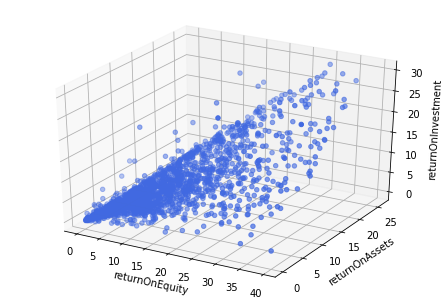

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig=plt.figure()
ax=Axes3D(fig)

x=list(indicators_df.iloc[:,0])
y=list(indicators_df.iloc[:,1])
z=list(indicators_df.iloc[:,2])


column_names=indicators_df.columns

ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

ax.scatter(x,y,z,c='royalBlue',marker='o')
plt.show()


In [11]:
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

min_max_scaler=MinMaxScaler()
std_scaler=StandardScaler()
robust_scaler=RobustScaler()


X_train_minmax=min_max_scaler.fit_transform(indicators_df)
X_train_standard=std_scaler.fit_transform(indicators_df)
X_train_robust=robust_scaler.fit_transform(indicators_df)


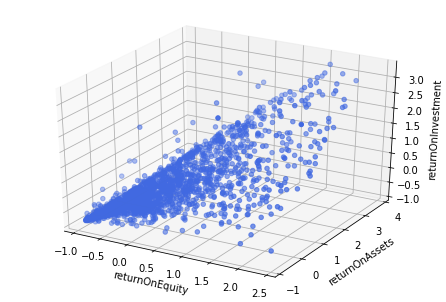

In [12]:

fig=plt.figure()
ax=Axes3D(fig)

x=X_train_robust[:,0]
y=X_train_robust[:,1]
z=X_train_robust[:,2]


column_names=indicators_df.columns

ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

ax.scatter(x,y,z,c='royalBlue',marker='o')
plt.show()

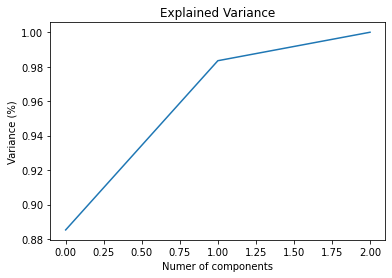

In [13]:
from sklearn.decomposition import PCA
import numpy as np

pca=PCA().fit(X_train_robust)

#plot through our scaled data
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Numer of components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

plt.show()

In [14]:
pca_datasets=PCA(n_components=2).fit(X_train_robust).transform(X_train_robust)

pca_datasets=pd.DataFrame(data=pca_datasets,columns=['component 1','component 2'])
pca_datasets.head()

,component 1,component 2
0,-0.629487,-0.200409
1,-0.522683,0.330626
2,-0.433569,0.196831
3,-0.371103,-0.281737
4,1.832524,-0.811197


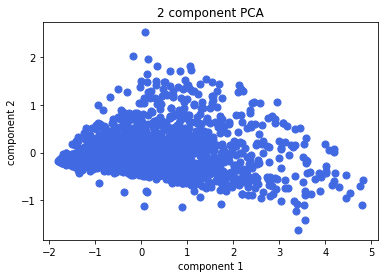

In [15]:
plt.figure()


plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('2 component PCA')

plt.scatter(pca_datasets['component 1'],pca_datasets['component 2'],c='royalBlue',s=50)

In [24]:
from sklearn.cluster import KMeans
from sklearn import metrics

results_dict={}

#define how many clusters we want to test up to

num_of_clusters=10

for k in range(2,num_of_clusters):
    print('-'*100)
    results_dict[k]={}

    kmeans=KMeans(n_clusters=k,random_state=0).fit(X_train_robust)

    sil_score=metrics.silhouette_score(X_train_robust,kmeans.labels_,metric='euclidean')

    results_dict[k]['silhouette_score']=sil_score
    results_dict[k]['inertia']=kmeans.inertia_
    results_dict[k]['score']=kmeans.score
    results_dict[k]['model']=kmeans


    print(f'Number of Clusters: {k}')
    print('Silhouette Score: ',sil_score)

----------------------------------------------------------------------------------------------------
Number of Clusters: 2
Silhouette Score:  0.5409025131522358
----------------------------------------------------------------------------------------------------
Number of Clusters: 3
Silhouette Score:  0.4715762202588651
----------------------------------------------------------------------------------------------------
Number of Clusters: 4
Silhouette Score:  0.40576519772835445
----------------------------------------------------------------------------------------------------
Number of Clusters: 5
Silhouette Score:  0.4176064168154567
----------------------------------------------------------------------------------------------------
Number of Clusters: 6
Silhouette Score:  0.39545762092592035
----------------------------------------------------------------------------------------------------
Number of Clusters: 7
Silhouette Score:  0.3683335833104357
--------------------------------

In [17]:

results_dict={}

#define how many clusters we want to test up to

num_of_clusters=10

for k in range(2,num_of_clusters):
    print('-'*100)
    results_dict[k]={}

    kmeans=KMeans(n_clusters=k,random_state=0).fit(pca_datasets)

    sil_score=metrics.silhouette_score(pca_datasets,kmeans.labels_,metric='euclidean')

    results_dict[k]['silhouette_score']=sil_score
    results_dict[k]['inertia']=kmeans.inertia_
    results_dict[k]['score']=kmeans.score
    results_dict[k]['model']=kmeans


    print(f'Number of Clusters: {k}')
    print('Silhouette Score: ',sil_score)

----------------------------------------------------------------------------------------------------
Number of Clusters: 2
Silhouette Score:  0.5491540143144819
----------------------------------------------------------------------------------------------------
Number of Clusters: 3
Silhouette Score:  0.4844668530469673
----------------------------------------------------------------------------------------------------
Number of Clusters: 4
Silhouette Score:  0.42238206450605215
----------------------------------------------------------------------------------------------------
Number of Clusters: 5
Silhouette Score:  0.43465107900612765
----------------------------------------------------------------------------------------------------
Number of Clusters: 6
Silhouette Score:  0.41597519474715533
----------------------------------------------------------------------------------------------------
Number of Clusters: 7
Silhouette Score:  0.38528525635039584
------------------------------

In [18]:
! pip install yellowbrick

     |████████████████████████████████| 274 kB 9.8 MB/s 


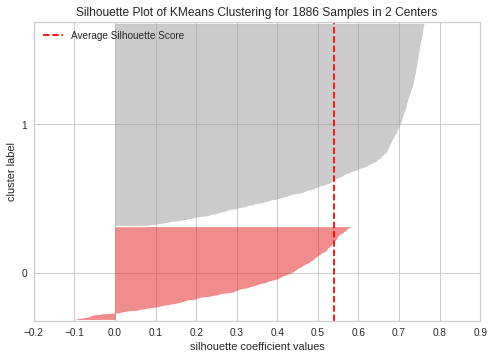

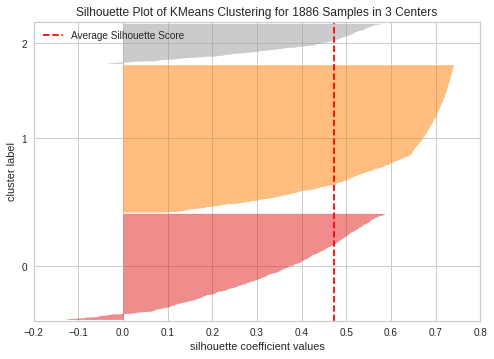

In [19]:
from yellowbrick.cluster import SilhouetteVisualizer

clusters=[2,3]

for cluster in clusters:
    kmeans=KMeans(n_clusters=cluster,random_state=0)

    visualizer=SilhouetteVisualizer(kmeans)

    visualizer.fit(X_train_robust)

    visualizer.poof()

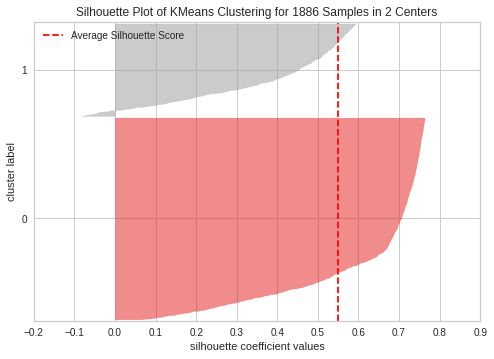

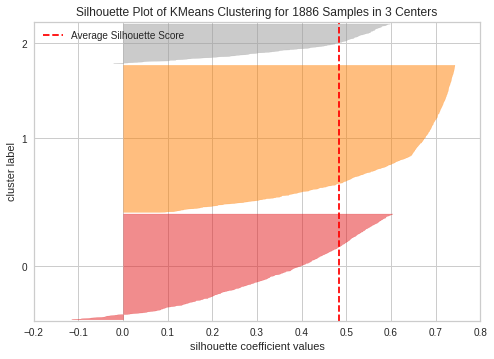

In [20]:
clusters=[2,3]

for cluster in clusters:
    kmeans=KMeans(n_clusters=cluster,random_state=0)

    visualizer=SilhouetteVisualizer(kmeans)

    visualizer.fit(pca_datasets)

    visualizer.poof()

****************************************************************************************************


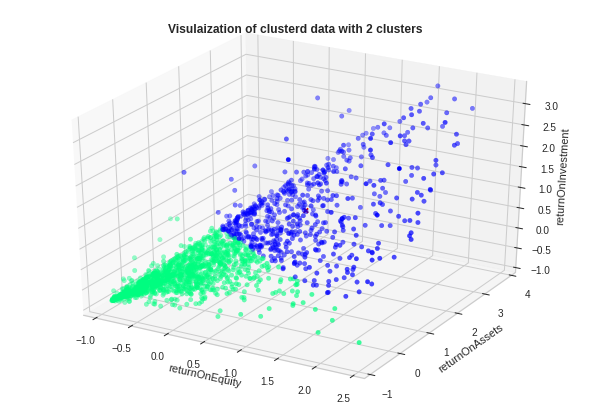

****************************************************************************************************


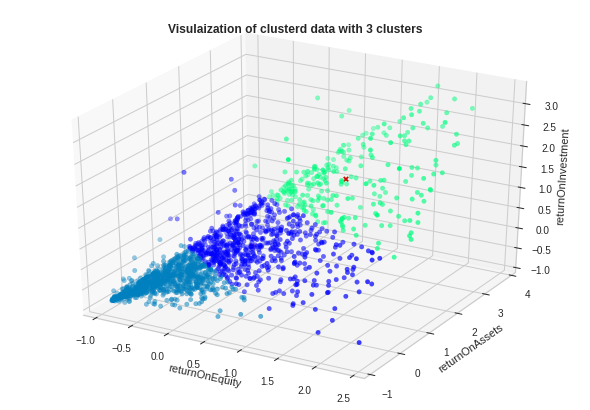

In [21]:
clusters=[2,3]

for cluster in clusters:

    print("*"*100)
    kmeans=KMeans(n_clusters=cluster,random_state=0).fit(X_train_robust)
    cluster_centers = kmeans.cluster_centers_
    c1=cluster_centers[:,0]
    c2=cluster_centers[:,1]
    c3=cluster_centers[:,2]

    fig=plt.figure()
    ax=Axes3D(fig)

    x=X_train_robust[:,0]
    y=X_train_robust[:,1]
    z=X_train_robust[:,2]


    column_names=indicators_df.columns

    ax.set_xlabel(column_names[0])
    ax.set_ylabel(column_names[1])
    ax.set_zlabel(column_names[2])

    ax.scatter(x,y,z,c=kmeans.labels_.astype(float),cmap='winter',marker='o')
    ax.scatter(c1,c2,c3,marker='x',color='r')

    plt.title(f'Visulaization of clusterd data with {cluster} clusters',fontweight='bold')
    plt.show()

----------------------------------------------------------------------------------------------------


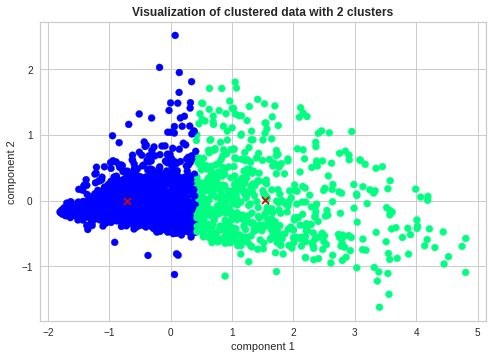

----------------------------------------------------------------------------------------------------


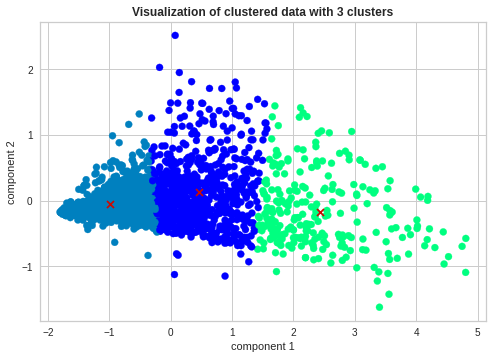

In [22]:
clusters = [2,3]

for cluster in clusters:
    
    print('-'*100)
    
    kmeans = KMeans(n_clusters= cluster, random_state=0).fit(pca_datasets)
    
    # define the cluster centers
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]

    # create a new plot
    plt.figure()

    # take the scaled data in this example.
    x = pca_datasets['component 1']
    y = pca_datasets['component 2']


    # define the axes labels
    column_names = pca_datasets.columns
    plt.xlabel(column_names[0])
    plt.ylabel(column_names[1])

    # Visualize it:
    plt.scatter(x, y, c=kmeans.labels_.astype(float), cmap='winter')
    plt.scatter(C1, C2, marker="x", color='r')

    # Plot the clustered data
    plt.title('Visualization of clustered data with {} clusters'.format(cluster), fontweight='bold')
    plt.show()

In [25]:
kmeans=results_dict[3]['model']

test_data=[[0.10,3.10,5.20],[0.60,5.10,2.20]]

kmeans.predict(test_data)

array([2, 2], dtype=int32)

In [27]:
kmeans.labels_

array([1, 1, 1, ..., 0, 1, 0], dtype=int32)